# 🎯 Synthetic Data Generation using GANs

## 🚀 Project Overview

This Notebook demonstrates the implementation of **Generative Adversarial Networks (GANs)** for generating synthetic screen time data. GANs are a class of machine learning models that can learn to generate new data samples that are similar to a training dataset.

### 🎯 Objectives:
- 📊 Build a GAN model to generate realistic synthetic screen time data
- 🧠 Train a Generator network to create fake data that mimics real usage patterns
- 🔍 Train a Discriminator network to distinguish between real and synthetic data
- 📈 Generate high-quality synthetic data for data augmentation and privacy-preserving analytics

### 📋 Dataset Features:
- **Usage (minutes)**: Daily screen time in minutes
- **Notifications**: Number of notifications received
- **Times Opened**: How many times apps were opened

### 🛠️ Technology Stack:
- **TensorFlow/Keras**: Deep learning framework
- **NumPy**: Numerical computations
- **Pandas**: Data manipulation
- **Scikit-learn**: Data preprocessing

## 📚 Import Required Libraries

This section imports all the necessary libraries for building and training our GAN model:



In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

## 📂 Dataset Loading & Exploration

### 📱 **Screen Time Analysis Dataset**

We're loading a real-world screen time dataset (`screentime_analysis.csv`) that contains user behavior data from mobile applications. This dataset provides insights into:

- **📊 Usage Patterns**: How much time users spend on different apps
- **🔔 Notification Behavior**: Frequency of notifications received
- **📲 App Opening Frequency**: How often users interact with applications
- **📅 Temporal Patterns**: Date-based usage trends


In [3]:
data = pd.read_csv('screentime_analysis.csv')

data.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


## Data Preprocessing:

Creating a Generative AI model using GANs for generating synthetic data, we need to:

1. Drop unnecessary columns

2. Normalize the data

3. Prepare the dataset for training

### 🗑️ **Step 1: Feature Selection**

We're removing the `Date` and `App` columns because:

- **📅 Date**: Temporal information doesn't represent user behavior patterns we want to model
- **📱 App**: Categorical data that would require encoding; we focus on numerical behavior patterns
- **🎯 Target Features**: We keep `Usage`, `Notifications`, and `Times Opened` as they represent core user behavior metrics

This leaves us with 3 continuous numerical features that capture the essential screen time behavior patterns.

In [ ]:
# Drop unnecessary columns:
data_gan = data.drop(columns=['Date', 'App'])

**Normalizing Dataset:** Initialize a MinMaxScaler to normalize the data between 0 and 1

In [6]:
# Normalizing the Data using MinMaxScaler:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_gan)

**Preparing Dataset For Training:** Ensure the remaining columns are numeric and ready for the model.

In [7]:
# Convert back to a DataFrame for training:
normalized_df = pd.DataFrame(normalized_data, columns=data_gan.columns)
normalized_df.head()

,Usage (minutes),Notifications,Times Opened
0,0.677966,0.163265,0.571429
1,0.754237,0.204082,0.530612
2,0.940678,0.224490,0.163265
3,0.686441,0.074830,0.377551
4,0.491525,0.319728,0.153061


## 🏗️ Building the GAN Architecture

🎭 **Workflow:**

1. The generator will be trained to produce data similar to the normalized Usage, Notifications, and Times opened columns.

2. The discriminator will be trained to distinguish between the real and generated data.


### 🎯 **Our GAN Architecture:**

```
Random Noise (100D) → Generator → Fake Data (3D)
                                      ↓
Real Data (3D) → Discriminator ← Fake Data (3D)
                      ↓
                Real/Fake (1D)
```

3. The discriminator will be trained to classify real vs fake data, and the generator will be trained to fool the discriminator.

### 🎨 **Generator:**


### 🏗️ **Layer Architecture:**

```
Random Noise (100D)
        ↓
    Dense(128) + LeakyReLU + BatchNorm
        ↓  
    Dense(256) + LeakyReLU + BatchNorm
        ↓
    Dense(512) + LeakyReLU + BatchNorm  
        ↓
    Dense(3) + Sigmoid
        ↓
Generated Data (3D) ∈ [0,1]
```

### 🔧 **Key Components:**

- **🎲 Latent Dimension (100)**: Size of random input space
- **⚡ LeakyReLU**: Prevents dying neurons and improves gradient flow
- **📊 BatchNormalization**: Stabilizes training and prevents mode collapse
- **🎯 Sigmoid Output**: Ensures generated values are in [0,1] range (matching our normalized data)


In [13]:
latent_dim = 100  # size of the random noise vector

latent_dim = 100  # latent space dimension (size of the random noise input)

# Build the Generator Model:
def build_generator(latent_dim):
    model = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.01),
        BatchNormalization(momentum=0.8),
        Dense(256),
        LeakyReLU(alpha=0.01),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.01),
        BatchNormalization(momentum=0.8),
        Dense(3, activation='sigmoid')  # output layer for generating 3 features
    ])
    return model

# create the generator
generator = build_generator(latent_dim)
generator.summary()

c:\Users\sandh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\sandh\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,659 (713.51 KB)

 Trainable params: 180,867 (706.51 KB)

 Non-trainable params: 1,792 (7.00 KB)

🧪 **Example** of generating data using generator network:

In [14]:
# generate random noise for 1000 samples
noise = np.random.normal(0, 1, (1000, latent_dim))

# generate synthetic data using the generator
generated_data = generator.predict(noise)

# display the generated data
generated_data[:5]  # show first 5 samples

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[0.6470194 , 0.602896  , 0.48596704],
       [0.6186858 , 0.57585454, 0.5567515 ],
       [0.57081145, 0.59834045, 0.49750566],
       [0.6576146 , 0.60913825, 0.53577495],
       [0.5632742 , 0.5492653 , 0.49415195]], dtype=float32)

### 🔍 **Discriminator:**

### 🏗️ **Layer Architecture:**

```
Screen Time Data (3D)
        ↓
    Dense(512) + LeakyReLU
        ↓
    Dense(256) + LeakyReLU
        ↓
    Dense(128) + LeakyReLU
        ↓
    Dense(1) + Sigmoid
        ↓
Real/Fake Probability ∈ [0,1]
```

### 🔧 **Key Design Choices:**

- **🔄 Progressive Reduction**: Network narrows from 512 → 256 → 128 → 1 neurons
- **⚡ LeakyReLU**: Maintains gradient flow for stable training
- **🎯 Binary Classification**: Single sigmoid output for real/fake decision
- **📊 Binary Crossentropy**: Loss function optimized for classification tasks



In [15]:
# Build the Discriminator Model:
def build_discriminator():
    model = Sequential([
        Dense(512, input_shape=(3,)),
        LeakyReLU(alpha=0.01),
        Dense(256),
        LeakyReLU(alpha=0.01),
        Dense(128),
        LeakyReLU(alpha=0.01),
        Dense(1, activation='sigmoid')  # output: 1 neuron for real/fake classification
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# create the discriminator
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,401 (650.00 KB)

 Trainable params: 166,401 (650.00 KB)

 Non-trainable params: 0 (0.00 B)

### **GAN Model:**

Freeze the discriminator’s weights when training the generator to ensure only the generator is updated during the training:

In [16]:
def build_gan(generator, discriminator):
    # freeze the discriminator’s weights while training the generator
    discriminator.trainable = False

    model = Sequential([generator, discriminator])
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model

# create the GAN
gan = build_gan(generator, discriminator)
gan.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 3)              │       182,659 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 1)              │       166,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,060 (1.33 MB)

 Trainable params: 180,867 (706.51 KB)

 Non-trainable params: 168,193 (657.00 KB)

## ⚔️ **GAN Model Training:**

**Workflow:**

1. Generate random noise.

2. Use the generator to create fake data.

3. Train the discriminator on both real and fake data.

4. Train the generator via the GAN to fool the discriminator.


In [7]:
def train_gan(gan, generator, discriminator, data, epochs=10000, batch_size=128, latent_dim=100):
    for epoch in range(epochs):
        # select a random batch of real data
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_data = data[idx]

        # generate a batch of fake data
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_data = generator.predict(noise)

        # labels for real and fake data
        real_labels = np.ones((batch_size, 1))  # real data has label 1
        fake_labels = np.zeros((batch_size, 1))  # fake data has label 0

        # train the discriminator
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)

        # train the generator via the GAN
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1)) 
        g_loss = gan.train_on_batch(noise, valid_labels)

        # print the progress every 1000 epochs
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: D Loss: {0.5 * np.add(d_loss_real, d_loss_fake)}, G Loss: {g_loss}")

train_gan(gan, generator, discriminator, normalized_data, epochs=10000, batch_size=128, latent_dim=latent_dim)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\sandh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0: D Loss: [0.6917102 0.75     ], G Loss: 0.6805163025856018
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━

## 🎯 **GAN Model Inference & Synthetic Data Generation**

Implementing the GAN Model to see how the generator can be used to generate new synthetic data:

In [12]:
# generate new data
noise = np.random.normal(0, 1, (1000, latent_dim))  # generate 1000 synthetic samples
generated_data = generator.predict(noise)

# convert the generated data back to the original scale
generated_data_rescaled = scaler.inverse_transform(generated_data)

# convert to DataFrame
generated_df = pd.DataFrame(generated_data_rescaled, columns=data_gan.columns)

generated_df

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,Usage (minutes),Notifications,Times Opened
0,49.037647,65.582352,51.257217
1,41.106583,85.491501,58.353561
2,49.989479,68.172028,50.463531
3,44.340916,86.585442,52.201515
4,49.057228,89.756042,45.165936
...,...,...,...
995,44.579708,60.496529,53.836452
996,55.505424,82.066345,50.109978
997,51.791073,75.687317,56.370243
998,45.221630,67.113869,54.960896


## 💾 **Save Synthetic Data to CSV**

### 🎯 **Data Persistence & Export**

Now that we've generated high-quality synthetic data, let's save it to a CSV file for future use and sharing.

- **📂 Organized Structure**: Creates an `outputs/` directory for clean file management
- **⏰ Timestamped Files**: Unique filenames prevent accidental overwrites
- **🔄 Reusable Format**: CSV format compatible with all data analysis tools




In [17]:
# Save synthetic data to CSV file
import os
from datetime import datetime

# Create outputs directory if it doesn't exist
os.makedirs('outputs', exist_ok=True)

# Generate timestamp for unique filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"outputs/synthetic_screentime_data_{timestamp}.csv"

# Save the generated DataFrame to CSV
generated_df.to_csv(filename, index=False)

print(f"✅ Synthetic data saved successfully!")
print(f"📁 File location: {filename}")
print(f"📊 Records saved: {len(generated_df):,}")
print(f"📋 Features: {list(generated_df.columns)}")
print(f"💾 File size: {os.path.getsize(filename) / 1024:.2f} KB")

# Display basic statistics of saved data
print("\n📈 Saved Data Summary:")
print(generated_df.describe())


✅ Synthetic data saved successfully!
📁 File location: outputs/synthetic_screentime_data_20250901_002202.csv
📊 Records saved: 1,000
📋 Features: ['Usage (minutes)', 'Notifications', 'Times Opened']
💾 File size: 28.68 KB

📈 Saved Data Summary:
       Usage (minutes)  Notifications  Times Opened
count      1000.000000    1000.000000   1000.000000
mean         45.951824      73.955269     55.767746
std           5.458260       7.218279      4.762656
min          28.670414      53.393147     40.894314
25%          42.320271      68.935879     52.613879
50%          45.938240      73.804611     55.852064
75%          49.531595      78.536459     58.772571
max          64.546898      97.122612     72.032089


## 📊 **Data Visualization & Quality Analysis**


These visualizations will help us assess whether our GAN successfully learned the underlying patterns in the screen time data.


In [18]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for professional-looking plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Visualization libraries imported successfully!")
print("🎨 Plot styling configured for professional presentation")


📊 Visualization libraries imported successfully!
🎨 Plot styling configured for professional presentation


###  **Distribution Comparison Analysis**

Compare the distributions of real vs synthetic data to validate that our GAN learned the correct patterns.


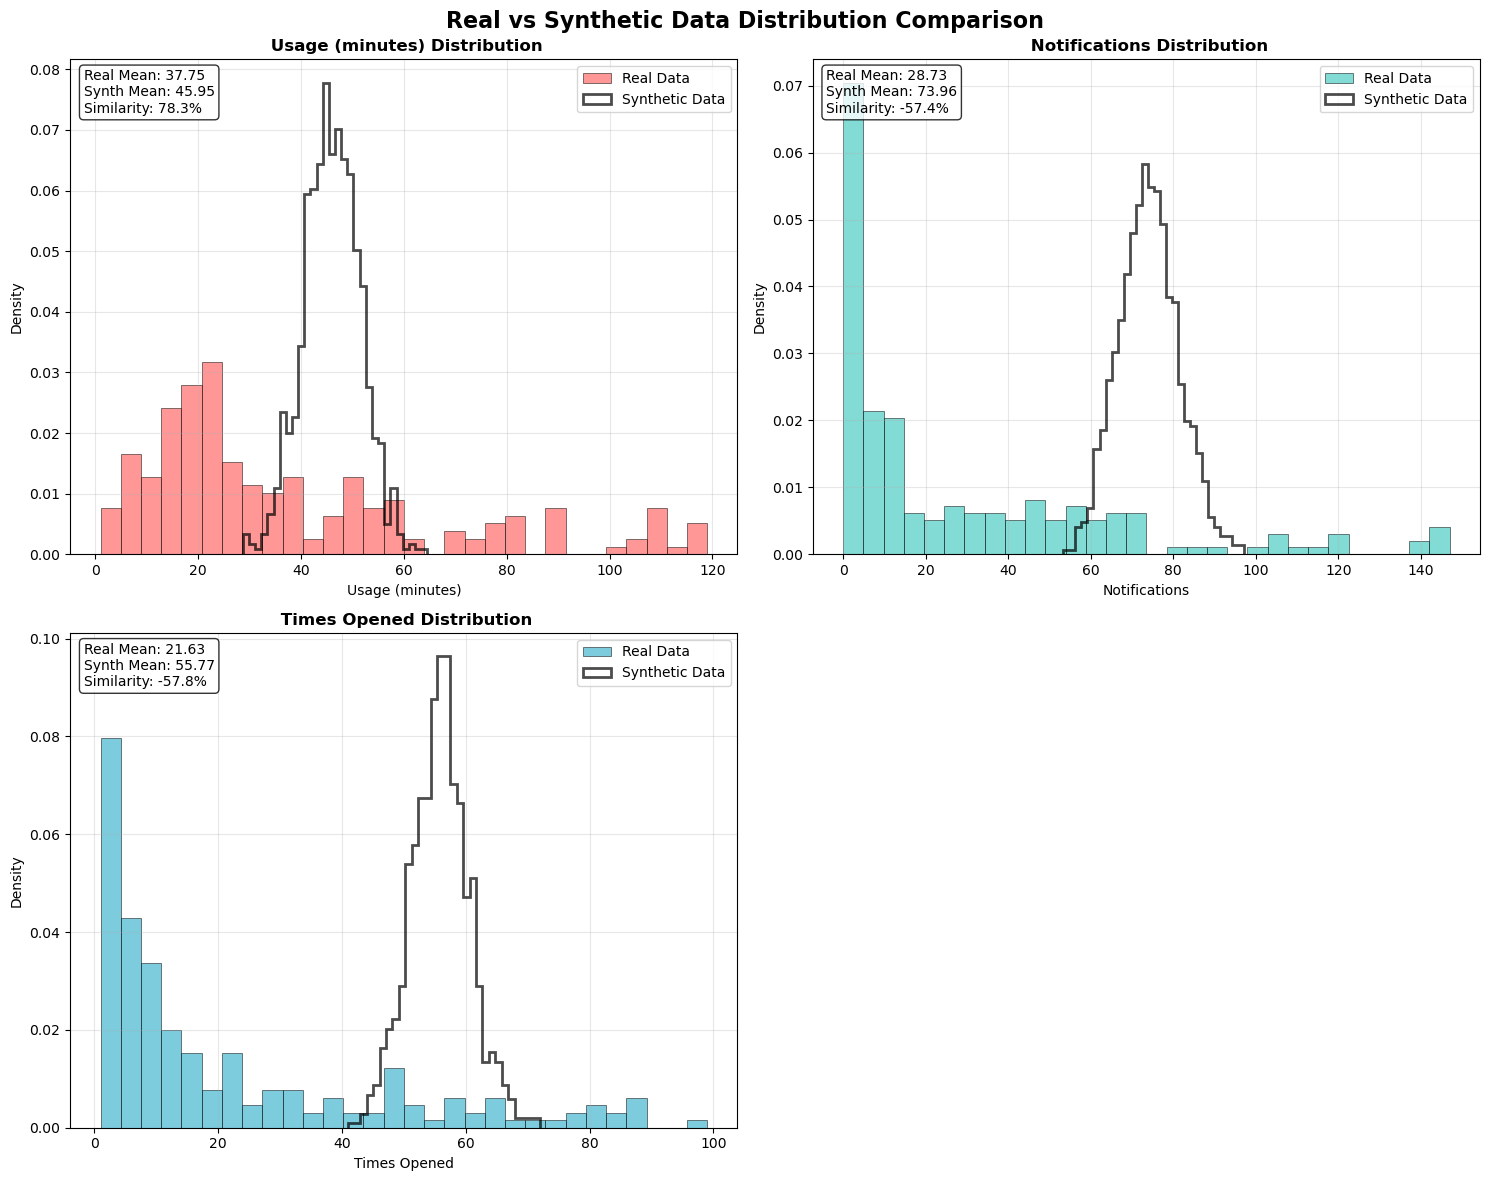

 Statistical Comparison Summary:

 Usage (minutes):
  Real    - Mean: 37.75, Std: 29.71
  Synthetic - Mean: 45.95, Std: 5.46
  📏 Mean Difference: 8.20
  📏 Std Difference: 24.25

 Notifications:
  Real    - Mean: 28.73, Std: 35.80
  Synthetic - Mean: 73.96, Std: 7.22
  📏 Mean Difference: 45.22
  📏 Std Difference: 28.58

 Times Opened:
  Real    - Mean: 21.63, Std: 24.27
  Synthetic - Mean: 55.77, Std: 4.76
  📏 Mean Difference: 34.14
  📏 Std Difference: 19.51


In [23]:
# Prepare data for comparison
real_data_df = pd.DataFrame(data_gan)  # Original data without Date/App columns
synthetic_data_df = generated_df.copy()

# Create distribution comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Real vs Synthetic Data Distribution Comparison', fontsize=16, fontweight='bold')

features = real_data_df.columns
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Plot distributions for each feature
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Plot histograms
    ax.hist(real_data_df[feature], bins=30, alpha=0.7, label='Real Data', 
            color=colors[i], density=True, edgecolor='black', linewidth=0.5)
    ax.hist(synthetic_data_df[feature], bins=30, alpha=0.7, label='Synthetic Data', 
            color=colors[i], density=True, edgecolor='black', 
            histtype='step', linewidth=2)
    
    ax.set_title(f' {feature} Distribution', fontweight='bold')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add statistics
    real_mean = real_data_df[feature].mean()
    synth_mean = synthetic_data_df[feature].mean()
    similarity = (1 - abs(real_mean - synth_mean) / real_mean) * 100
    
    ax.text(0.02, 0.98, f'Real Mean: {real_mean:.2f}\nSynth Mean: {synth_mean:.2f}\nSimilarity: {similarity:.1f}%', 
            transform=ax.transAxes, verticalalignment='top', 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remove empty subplot
axes[1, 1].remove()

plt.tight_layout()
plt.show()

# Print statistical comparison
print(" Statistical Comparison Summary:")
print("=" * 50)
for feature in features:
    real_stats = real_data_df[feature].describe()
    synth_stats = synthetic_data_df[feature].describe()
    
    print(f"\n {feature}:")
    print(f"  Real    - Mean: {real_stats['mean']:.2f}, Std: {real_stats['std']:.2f}")
    print(f"  Synthetic - Mean: {synth_stats['mean']:.2f}, Std: {synth_stats['std']:.2f}")
    print(f"  📏 Mean Difference: {abs(real_stats['mean'] - synth_stats['mean']):.2f}")
    print(f"  📏 Std Difference: {abs(real_stats['std'] - synth_stats['std']):.2f}")
